# Challenge: What to use
Using selected questions from the 2012 and 2014 editions of the [European Social Survey](http://www.europeansocialsurvey.org/data/round-index.html), address the following questions. For each question, explain why you chose the approach you did.

Here is the [data file](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv). And here is the [codebook](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html), with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data
ess = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [5]:
ess.shape

(8594, 13)

In [49]:
ess.columns

Index(['cntry', 'idno', 'year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner'],
      dtype='object')

In [9]:
ess.nunique()

cntry         6
idno       3086
year          2
tvtot         8
ppltrst      11
pplfair      11
pplhlp       11
happy        11
sclmeet       7
sclact        5
gndr          2
agea         83
partner       2
dtype: int64

## 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

Distributions of "ppltrst":


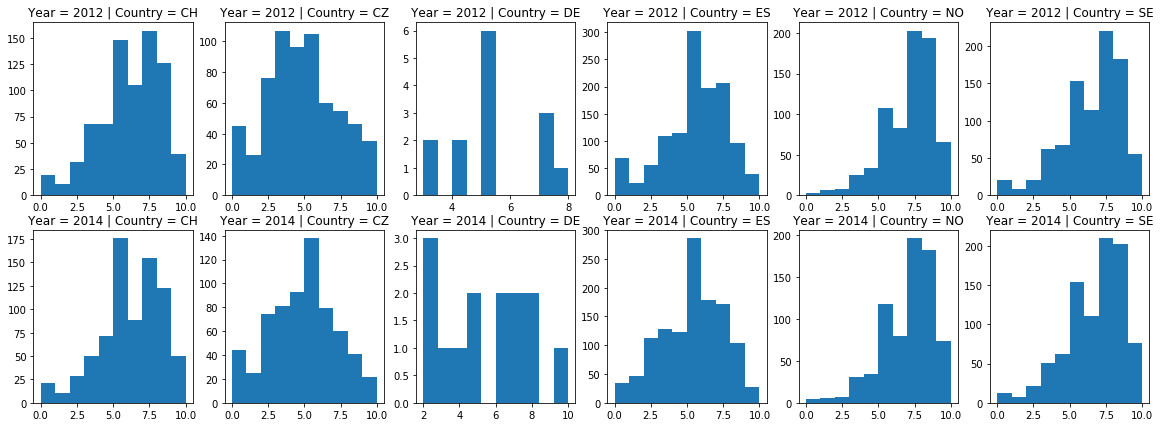

In [61]:
unique_year = list(np.unique(ess['year']))
rows = len(unique_year)

unique_cntry = list(np.unique(ess['cntry']))
cols = len(unique_cntry)

print('Distributions of "ppltrst":')
plt.figure(figsize = (20, 7))
i = 1
for row in range(rows):
    for col in range(cols):
        plt.subplot(rows,cols,i)
        plt.hist(ess['ppltrst'][ess['cntry']==unique_cntry[col]][ess['year']==unique_year[row]].dropna())
        plt.title('Year = ' + str(2000 + 2*(unique_year[row])) + ' | Country = ' + unique_cntry[col])
        i = i+1
        
plt.show()

In [92]:
# Import parametric statistics
from scipy.stats import ttest_ind, shapiro
# Import nonparametric statistics
from scipy.stats import kruskal
# Import test for normality
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print('T-Tests:\n')
for cntry in unique_cntry:
    print(cntry, ': ', stats.ttest_ind(ess['ppltrst'][ess['cntry']==cntry][ess['year']==6].dropna(), ess['ppltrst'][ess['cntry']==cntry][ess['year']==7].dropna()))
    
print('----------------------------------------------------------------\n')    
print('Tukey HSD Test:\n')
for cntry in unique_cntry:
    print(cntry, ': \n')
    trust = np.asarray(ess['ppltrst'][ess['cntry']==cntry][ess['year']==6].dropna().tolist() + ess['ppltrst'][ess['cntry']==cntry][ess['year']==7].dropna().tolist())
    years = np.repeat(np.array(unique_year), len(trust)/2)
    tukey = pairwise_tukeyhsd(endog=trust,      # Data
                          groups=years,   # Groups
                          alpha=0.05)         # Significance level

    print(tukey.summary())
    print('\n\n')
        
print('Krushkal-Wallace Test:\n')
for cntry in unique_cntry:
    print(cntry, ': ')
    # Join all ratings together into a list, then ranking them.
    ranks = stats.rankdata(ess['ppltrst'][ess['cntry']==cntry][ess['year']==6].dropna().tolist() + ess['ppltrst'][ess['cntry']==cntry][ess['year']==7].dropna().tolist())

    # Add the new ranked variables to the data frame.
    new_ess = pd.DataFrame()
    new_ess['Ranks_2012_'+cntry] = ranks[0:int(len(ranks)/2)]
    new_ess['Ranks_2014_'+cntry] = ranks[int(len(ranks)/2):int(len(ranks))]

    # Average rank per group.
    groups = ['Ranks_2012_'+cntry, 'Ranks_2014_'+cntry]
    print(new_ess[groups].apply(np.mean))

    # Overall average rank.
    print(np.mean(ranks))

    # Print the test statistic followed by the probability of getting this result
    # if the groups were not different.
    print(stats.kruskal(ess['ppltrst'][ess['cntry']==cntry][ess['year']==6].dropna(),ess['ppltrst'][ess['cntry']==cntry][ess['year']==7].dropna()))
    print('\n\n')  

T-Tests:

CH :  Ttest_indResult(statistic=-0.6782716584661505, pvalue=0.49770110247151234)
CZ :  Ttest_indResult(statistic=-0.47654431369598554, pvalue=0.6337663626856563)
DE :  Ttest_indResult(statistic=-0.18084358577434545, pvalue=0.8578926631223287)
ES :  Ttest_indResult(statistic=2.494276516716002, pvalue=0.012687599930326627)
NO :  Ttest_indResult(statistic=0.5437669865283744, pvalue=0.5866849635988214)
SE :  Ttest_indResult(statistic=-2.089164843127998, pvalue=0.03683208699520371)
----------------------------------------------------------------

Tukey HSD Test:

CH : 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper reject
-------------------------------------------
  6      7     0.0737  -0.1395 0.287 False 
-------------------------------------------



CZ : 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  6      7     0.0627  -0.1931 0.3185 Fa

Using t-tests, Tukey's Honest Significant Differences Test, and Krushkal-Wallace Test, we can see that only Spain and Sweden show a statistically significant change in ppltrst between 2012 and 2014.

## 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

Distributions of "happy":


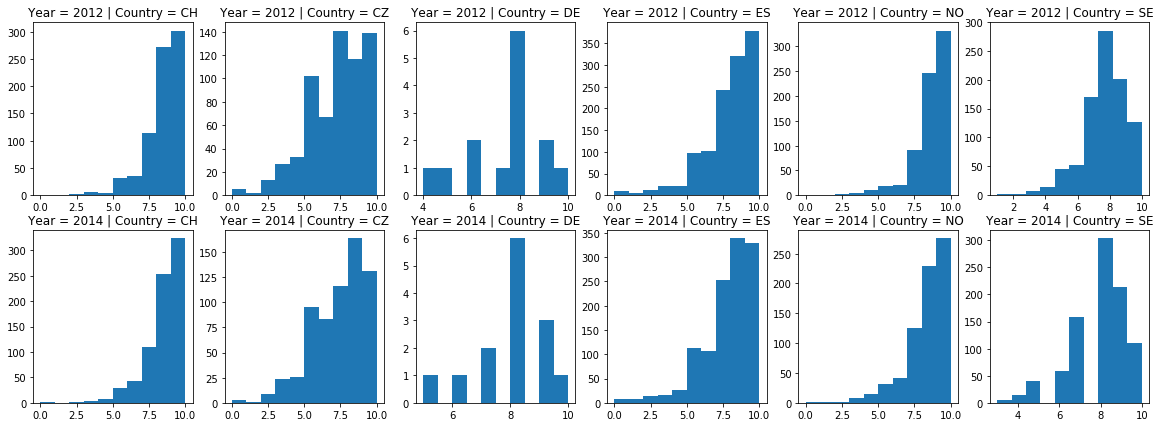

In [79]:
print('Distributions of "happy":')
plt.figure(figsize = (20, 7))
i = 1
for row in range(rows):
    for col in range(cols):
        plt.subplot(rows,cols,i)
        plt.hist(ess['happy'][ess['cntry']==unique_cntry[col]][ess['year']==unique_year[row]].dropna())
        plt.title('Year = ' + str(2000 + 2*(unique_year[row])) + ' | Country = ' + unique_cntry[col])
        i = i+1
        
plt.show()

In [112]:
print('T-Tests:\n')
for cntry in unique_cntry:
    print(cntry, ': ', stats.ttest_ind(ess['happy'][ess['cntry']==cntry][ess['year']==6].dropna(), ess['happy'][ess['cntry']==cntry][ess['year']==7].dropna()))
    
print('----------------------------------------------------------------\n')    
print('Tukey HSD Test:\n')
for cntry in unique_cntry:
    print(cntry, ': \n')
    df = pd.DataFrame()
    df['6'] = list(ess['happy'][ess['cntry']==cntry][ess['year']==6])
    df['7'] = list(ess['happy'][ess['cntry']==cntry][ess['year']==7])
    df = df.dropna()
    df = df.reset_index(drop=True)
    
    happy = np.asarray(df['6'].tolist() + df['7'].tolist())
    years = np.repeat(np.array(unique_year), len(happy)/2)
    tukey = pairwise_tukeyhsd(endog=happy,      # Data
                          groups=years,   # Groups
                          alpha=0.05)         # Significance level

    print(tukey.summary())
    print('\n\n')
        
print('Krushkal-Wallace Test:\n')
for cntry in unique_cntry:
    print(cntry, ': ')
    # Join all ratings together into a list, then ranking them.
    df = pd.DataFrame()
    df['6'] = list(ess['happy'][ess['cntry']==cntry][ess['year']==6])
    df['7'] = list(ess['happy'][ess['cntry']==cntry][ess['year']==7])
    df = df.dropna()
    df = df.reset_index(drop=True)
    
    ranks = stats.rankdata(df['6'].tolist() + df['7'].tolist())

    # Add the new ranked variables to the data frame.
    new_ess = pd.DataFrame()
    new_ess['Ranks_2012_'+cntry] = ranks[0:int(len(ranks)/2)]
    new_ess['Ranks_2014_'+cntry] = ranks[int(len(ranks)/2):int(len(ranks))]

    # Average rank per group.
    groups = ['Ranks_2012_'+cntry, 'Ranks_2014_'+cntry]
    print(new_ess[groups].apply(np.mean))

    # Overall average rank.
    print(np.mean(ranks))

    # Print the test statistic followed by the probability of getting this result
    # if the groups were not different.
    print(stats.kruskal(df['6'],df['7']))
    print('\n\n')  

T-Tests:

CH :  Ttest_indResult(statistic=-0.3883916732706544, pvalue=0.6977798552554684)
CZ :  Ttest_indResult(statistic=-1.3033790688858846, pvalue=0.19267687243592707)
DE :  Ttest_indResult(statistic=-0.7648529270389165, pvalue=0.451246041120838)
ES :  Ttest_indResult(statistic=1.673984509948487, pvalue=0.09426276206929331)
NO :  Ttest_indResult(statistic=4.26539164981969, pvalue=2.1241259786815807e-05)
SE :  Ttest_indResult(statistic=-0.5748685401292095, pvalue=0.5654516534862527)
----------------------------------------------------------------

Tukey HSD Test:

CH : 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  6      7     0.0234  -0.1188 0.1655 False 
--------------------------------------------



CZ : 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  6      7     0.1625  -0.0547 0.3797 

According to the Krushkal-Wallace Test, the countries that had significantly different happiness levels between the two years were Norway and Spain.

## 3. Who reported watching more TV in 2012, men or women?

Distributions of "tvtot" in 2012:


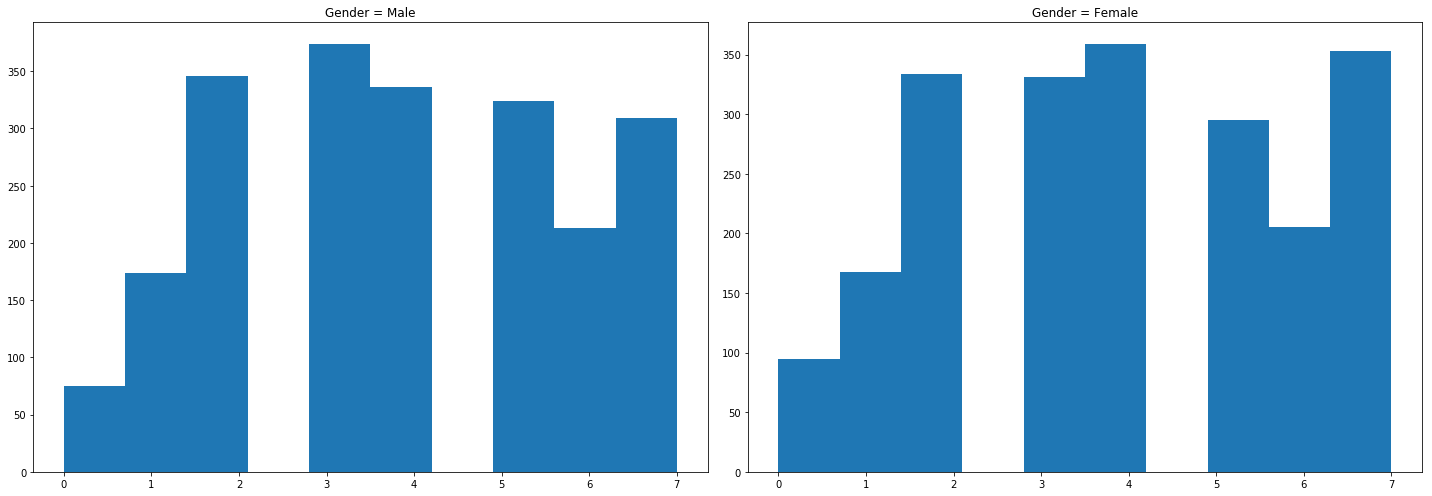

In [131]:
unique_gndr = list(np.unique(ess['gndr'].dropna()))
cols = len(unique_gndr)

rows = 1

print('Distributions of "tvtot" in 2012:')
plt.figure(figsize = (20, 7))
i = 1
for col in range(cols):
    plt.subplot(rows,cols,i)
    plt.hist(ess['tvtot'][ess['gndr']==unique_gndr[col]][ess['year']==6].dropna())
    plt.title('Gender = ' + ['Male' if unique_gndr[col]==1 else 'Female'][0])
    i = i+1
        
plt.tight_layout()
plt.show()

In [139]:
print('T-Tests:\n')
print(stats.ttest_ind(ess['tvtot'][ess['gndr']==1][ess['year']==6].dropna(), ess['tvtot'][ess['gndr']==2][ess['year']==6].dropna()))
    
print('----------------------------------------------------------------\n')    
print('Tukey HSD Test:\n')
df = pd.DataFrame()
df['2'] = list(ess['tvtot'][ess['gndr']==2][ess['year']==6])
df['1'] = list(ess['tvtot'][ess['gndr']==1][ess['year']==6])[:len(df['2'])]
df = df.dropna()
df = df.reset_index(drop=True)
    
tv = np.asarray(df['1'].tolist() + df['2'].tolist())
genders = np.repeat(np.array(unique_gndr), len(tv)/2)
tukey = pairwise_tukeyhsd(endog=tv,      # Data
                      groups=genders,   # Groups
                      alpha=0.05)         # Significance level

print(tukey.summary())
print('\n\n')
        
print('Krushkal-Wallace Test:\n')
# Join all ratings together into a list, then ranking them.
df = pd.DataFrame()
df['2'] = list(ess['tvtot'][ess['gndr']==2][ess['year']==6])
df['1'] = list(ess['tvtot'][ess['gndr']==1][ess['year']==6])[:len(df['2'])]
df = df.dropna()
df = df.reset_index(drop=True)

ranks = stats.rankdata(df['1'].tolist() + df['2'].tolist())

# Add the new ranked variables to the data frame.
new_ess = pd.DataFrame()
new_ess['Ranks_Male'] = ranks[0:int(len(ranks)/2)]
new_ess['Ranks_Female'] = ranks[int(len(ranks)/2):int(len(ranks))]

# Average rank per group.
groups = ['Ranks_Male', 'Ranks_Female']
print(new_ess[groups].apply(np.mean))

# Overall average rank.
print(np.mean(ranks))

# Print the test statistic followed by the probability of getting this result
# if the groups were not different.
print(stats.kruskal(df['1'],df['2']))
print('\n\n')  

T-Tests:

Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.4902360402696986)
----------------------------------------------------------------

Tukey HSD Test:

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
 1.0    2.0    0.0379  -0.083 0.1588 False 
-------------------------------------------



Krushkal-Wallace Test:

Ranks_Male      2124.729761
Ranks_Female    2150.270239
dtype: float64
2137.5
KruskalResult(statistic=0.46750354277893014, pvalue=0.49413790298993576)





There is no statistically significant difference between the TV watching of men vs. women in 2012.

## 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

Distributions of "pplfair" in 2012:


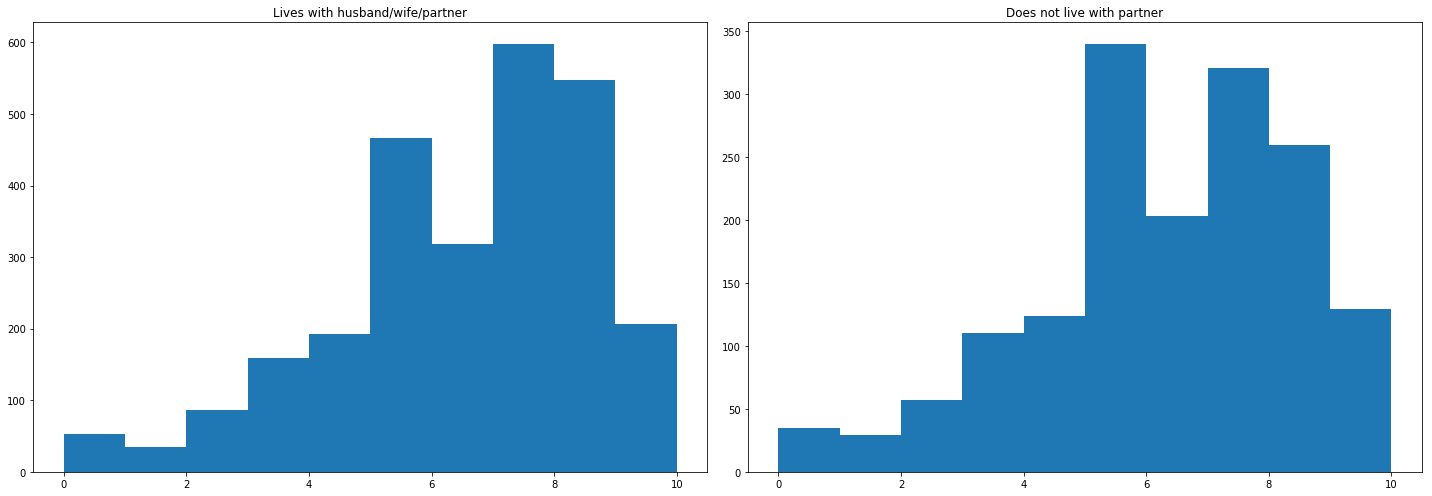

In [136]:
unique_partner = list(np.unique(ess['partner'].dropna()))
cols = len(unique_partner)

rows = 1

print('Distributions of "pplfair" in 2012:')
plt.figure(figsize = (20, 7))
i = 1
for col in range(cols):
    plt.subplot(rows,cols,i)
    plt.hist(ess['pplfair'][ess['partner']==unique_partner[col]][ess['year']==6].dropna())
    plt.title(['Lives with husband/wife/partner' if unique_partner[col]==1 else 'Does not live with partner'][0])
    i = i+1
        
plt.tight_layout()
plt.show()

In [141]:
print('T-Tests:\n')
print(stats.ttest_ind(ess['pplfair'][ess['partner']==1][ess['year']==6].dropna(), ess['pplfair'][ess['partner']==2][ess['year']==6].dropna()))
    
print('----------------------------------------------------------------\n')    
print('Tukey HSD Test:\n')
df = pd.DataFrame()
df['2'] = list(ess['pplfair'][ess['partner']==2][ess['year']==6])
df['1'] = list(ess['pplfair'][ess['partner']==1][ess['year']==6])[:len(df['2'])]
df = df.dropna()
df = df.reset_index(drop=True)
    
fair = np.asarray(df['1'].tolist() + df['2'].tolist())
partners = np.repeat(np.array(unique_partner), len(fair)/2)
tukey = pairwise_tukeyhsd(endog=fair,      # Data
                      groups=partners,   # Groups
                      alpha=0.05)         # Significance level

print(tukey.summary())
print('\n\n')
        
print('Krushkal-Wallace Test:\n')
# Join all ratings together into a list, then ranking them.
df = pd.DataFrame()
df['2'] = list(ess['pplfair'][ess['partner']==2][ess['year']==6])
df['1'] = list(ess['pplfair'][ess['partner']==1][ess['year']==6])[:len(df['2'])]
df = df.dropna()
df = df.reset_index(drop=True)

ranks = stats.rankdata(df['1'].tolist() + df['2'].tolist())

# Add the new ranked variables to the data frame.
new_ess = pd.DataFrame()
new_ess['Ranks_Partner'] = ranks[0:int(len(ranks)/2)]
new_ess['Ranks_NoPartner'] = ranks[int(len(ranks)/2):int(len(ranks))]

# Average rank per group.
groups = ['Ranks_Partner', 'Ranks_NoPartner']
print(new_ess[groups].apply(np.mean))

# Overall average rank.
print(np.mean(ranks))

# Print the test statistic followed by the probability of getting this result
# if the groups were not different.
print(stats.kruskal(df['1'],df['2']))
print('\n\n')  

T-Tests:

Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609883756)
----------------------------------------------------------------

Tukey HSD Test:

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
 1.0    2.0    0.2439  0.0921 0.3957  True 
-------------------------------------------



Krushkal-Wallace Test:

Ranks_Partner      1551.020325
Ranks_NoPartner    1647.979675
dtype: float64
1599.5
KruskalResult(statistic=9.033279123389844, pvalue=0.0026510850131558823)





According to all three tests, there is a statistically significant difference between the groups' views on peoples' fairness. 

In [144]:
print('Median Fairness Levels Assumbed by People Living with a Partner: ', np.median(ess['pplfair'][ess['partner']==1][ess['year']==6].dropna()))
print('Median Fairness Levels Assumbed by People Not Living with a Partner: ', np.median(ess['pplfair'][ess['partner']==2][ess['year']==6].dropna()))

Median Fairness Levels Assumbed by People Living with a Partner:  7.0
Median Fairness Levels Assumbed by People Not Living with a Partner:  6.0


Therefore, people living alone are less likely to believe in the fairness of people than those living with a partner.

## 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

Distributions of "sclmeet" in 2014:


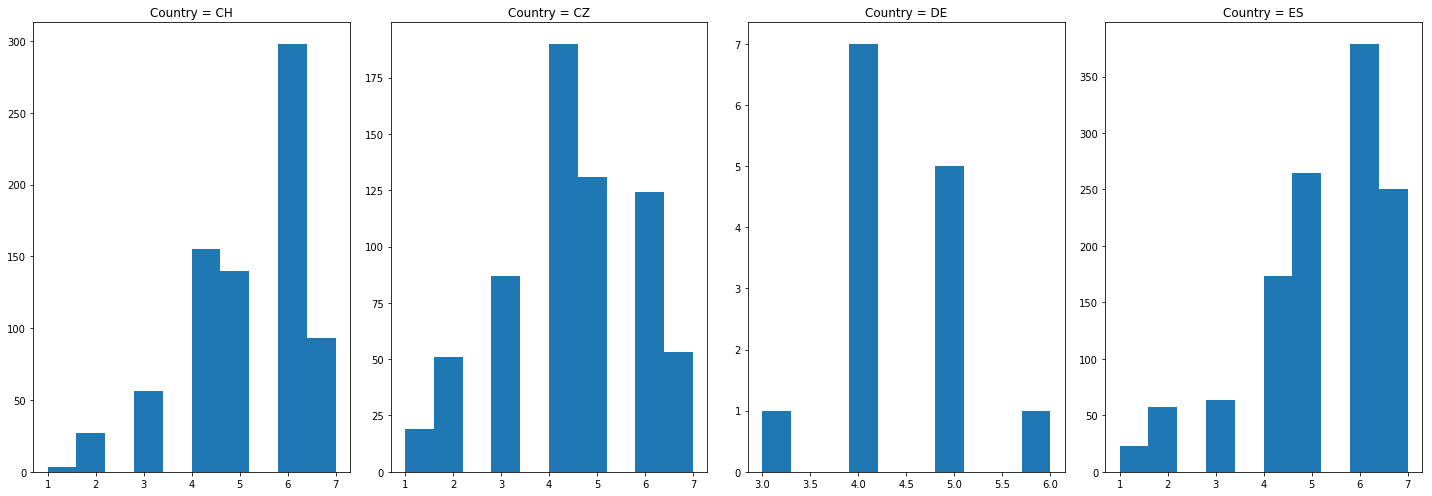

In [148]:
countries = ['CH', 'CZ', 'DE', 'ES']
cols = len(countries)
rows = 1

print('Distributions of "sclmeet" in 2014:')
plt.figure(figsize = (20, 7))
for i in range(cols):
    plt.subplot(rows,cols,i+1)
    plt.hist(ess['sclmeet'][ess['cntry']==countries[i]][ess['year']==7].dropna())
    plt.title('Country = ' + countries[i])
        
plt.tight_layout()
plt.show()

In [156]:
print('T-Tests:\n')
for i in range(len(countries)):
    for j in range(i, len(countries)):
        if i != j:
            print(countries[i] + ' vs. ' + countries[j] + ': ')
            print(stats.ttest_ind(ess['sclmeet'][ess['cntry']==countries[i]][ess['year']==7].dropna(), ess['sclmeet'][ess['cntry']==countries[j]][ess['year']==7].dropna()))

print('\n----------------------------------------------------------------\n')    
print('\n')
        
print('Krushkal-Wallace Test:\n')
for i in range(len(countries)):
    for j in range(i, len(countries)):
        if i != j:
            # Join all ratings together into a list, then ranking them.
            if len(list(ess['sclmeet'][ess['cntry']==countries[i]][ess['year']==7])) < len(list(ess['sclmeet'][ess['cntry']==countries[j]][ess['year']==7])):
                length = len(list(ess['sclmeet'][ess['cntry']==countries[i]][ess['year']==7]))
            else:
                length = len(list(ess['sclmeet'][ess['cntry']==countries[j]][ess['year']==7]))
            
            df = pd.DataFrame()
            df['1'] = list(ess['sclmeet'][ess['cntry']==countries[j]][ess['year']==7])[:length]
            df['2'] = list(ess['sclmeet'][ess['cntry']==countries[i]][ess['year']==7])[:length]            
            df = df.dropna()
            df = df.reset_index(drop=True)

            ranks = stats.rankdata(df['1'].tolist() + df['2'].tolist())

            # Add the new ranked variables to the data frame.
            new_ess = pd.DataFrame()
            new_ess['Ranks_'+countries[i]] = ranks[0:int(len(ranks)/2)]
            new_ess['Ranks_'+countries[j]] = ranks[int(len(ranks)/2):int(len(ranks))]

            # Average rank per group.
            groups = ['Ranks_'+countries[i], 'Ranks_'+countries[j]]
            print(new_ess[groups].apply(np.mean))

            # Overall average rank.
            print(np.mean(ranks))

            # Print the test statistic followed by the probability of getting this result
            # if the groups were not different.
            print(countries[i] + ' vs. ' + countries[j] + ': ')
            print(stats.kruskal(df['1'],df['2']))
            print('\n\n')  

T-Tests:

CH vs. CZ: 
Ttest_indResult(statistic=9.675850699914886, pvalue=1.7204743885392493e-21)
CH vs. DE: 
Ttest_indResult(statistic=2.0861293215128325, pvalue=0.037289604714147245)
CH vs. ES: 
Ttest_indResult(statistic=-1.5343317353073618, pvalue=0.12510774525042745)
CZ vs. DE: 
Ttest_indResult(statistic=0.0433661445611368, pvalue=0.9654226437207307)
CZ vs. ES: 
Ttest_indResult(statistic=-11.400026538179093, pvalue=3.7676844407353374e-29)
DE vs. ES: 
Ttest_indResult(statistic=-2.115791799094089, pvalue=0.03456418756613026)

----------------------------------------------------------------



Krushkal-Wallace Test:

Ranks_CH    560.493884
Ranks_CZ    748.506116
dtype: float64
654.5
CH vs. CZ: 
KruskalResult(statistic=85.08308678244794, pvalue=2.860872381354314e-20)



Ranks_CH     9.607143
Ranks_DE    19.392857
dtype: float64
14.5
CH vs. DE: 
KruskalResult(statistic=10.67768647281923, pvalue=0.0010843559298230909)



Ranks_CH    802.542857
Ranks_ES    738.457143
dtype: float64
770.5


The results of the above tests can allow us to conclude that:
 - China is significantly different from the Czech Republic, Denmark, and Spain.
 - The Czech Republic is significantly different from China and Spain, but not from Denmark. 
 - Spain is significantly different from the Czech Republic, Denmark, and China.
 - Denmark is significantly different from Spain and China, but not from the Czech Republic.

In [160]:
cntry_string = ['China', 'Czech Republic', 'Denmark', 'Spain']
for i in range(len(countries)):
    print('Median Social Meetings by People in ' + cntry_string[i] + ': ' + str(np.median(ess['sclmeet'][ess['cntry']==countries[i]][ess['year']==7].dropna())))


Median Social Meetings by People in China: 6.0
Median Social Meetings by People in Czech Republic: 4.0
Median Social Meetings by People in Denmark: 4.0
Median Social Meetings by People in Spain: 6.0


Overall, China and Spain are both standout countries, in that they have more social meetings compared to the other countries in this set.

## 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [165]:
unique_age = np.unique(ess['agea'].dropna())

Distributions of "sclact" in 2014, Separated by Age:


<Figure size 1440x504 with 0 Axes>

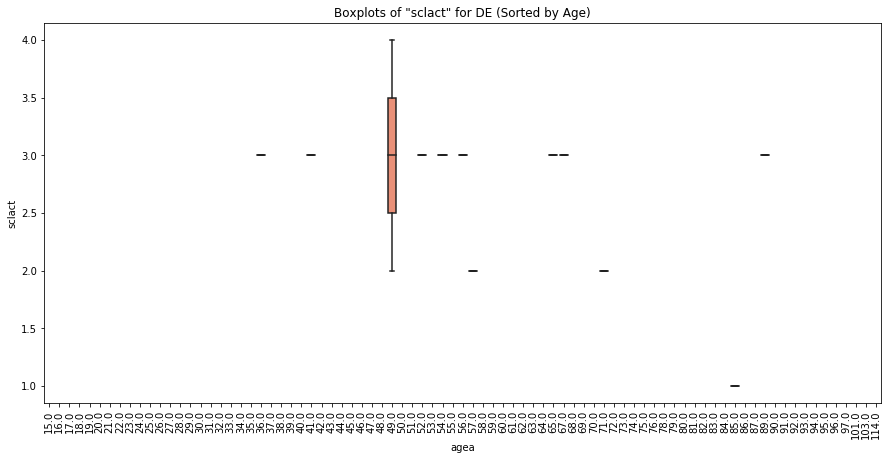

<Figure size 1440x504 with 0 Axes>

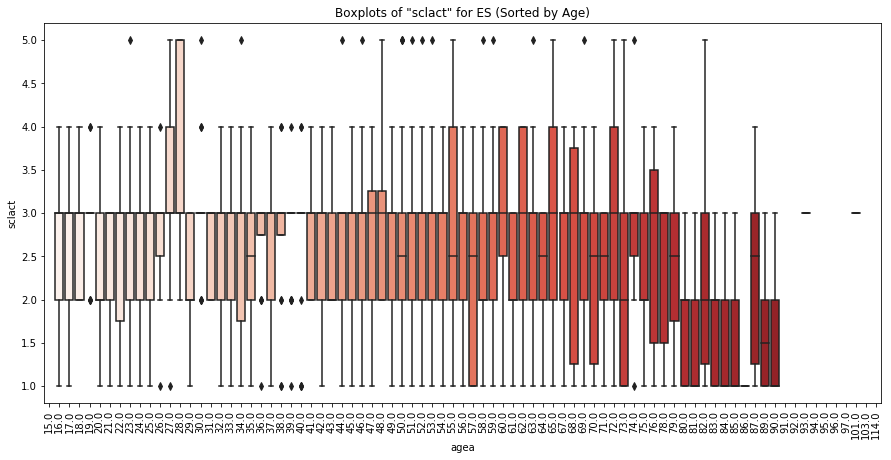

<Figure size 1440x504 with 0 Axes>

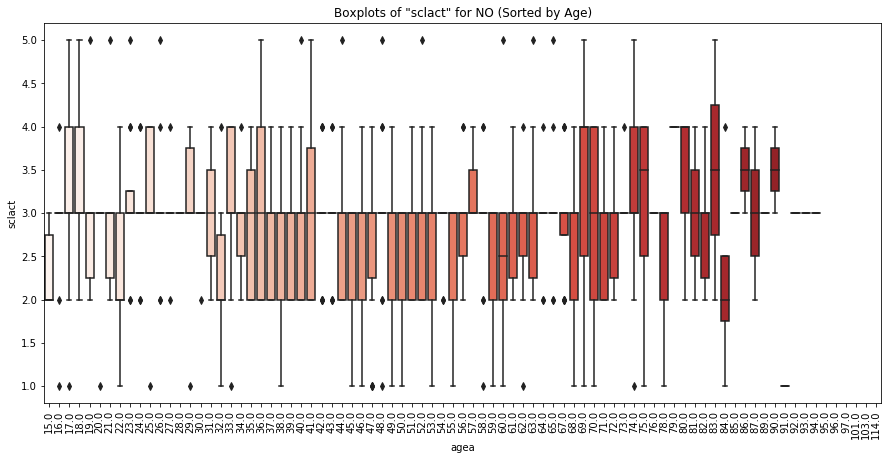

<Figure size 1440x504 with 0 Axes>

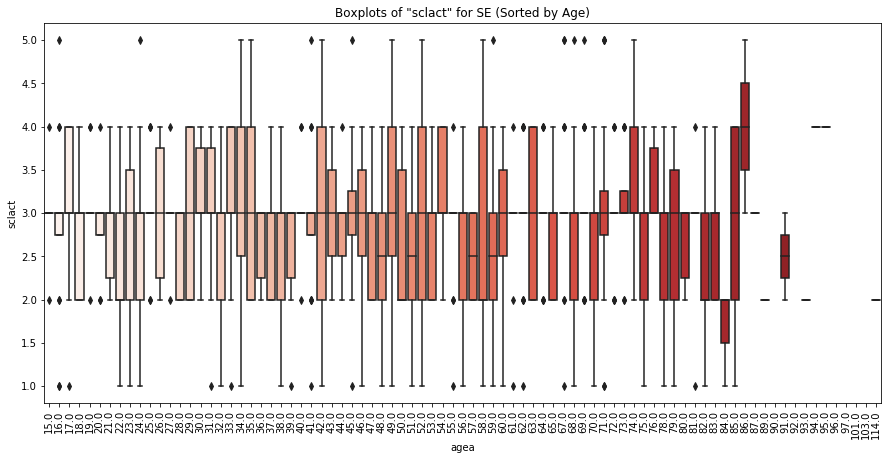

In [167]:
countries = ['DE', 'ES', 'NO', 'SE']

print('Distributions of "sclact" in 2014, Separated by Age:')

for cntry in countries:
    plt.figure(figsize = (20, 7))
    #Boxplot Distributions of Continuous Variables by Category
    plt.figure(figsize=(15, 7))
    sns.boxplot(x='agea', y='sclact', data=ess[ess['year']==7][ess['cntry']==cntry], palette='Reds', order = unique_age)
    plt.xticks(rotation=90)
    plt.title('Boxplots of "sclact" for ' + cntry + ' (Sorted by Age)')
    plt.show()

Distributions of "sclact" in 2014:


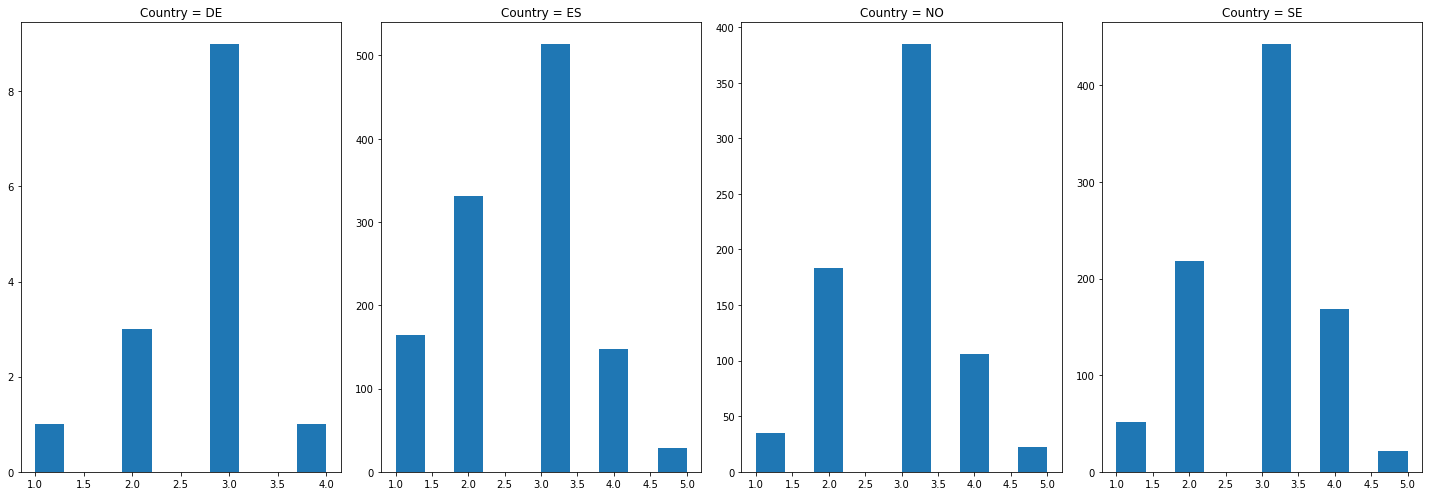

In [168]:
cols = len(countries)
rows = 1

print('Distributions of "sclact" in 2014:')
plt.figure(figsize = (20, 7))
for i in range(cols):
    plt.subplot(rows,cols,i+1)
    plt.hist(ess['sclact'][ess['cntry']==countries[i]][ess['year']==7].dropna())
    plt.title('Country = ' + countries[i])
        
plt.tight_layout()
plt.show()

In [169]:
print('T-Tests:\n')
for i in range(len(countries)):
    for j in range(i, len(countries)):
        if i != j:
            print(countries[i] + ' vs. ' + countries[j] + ': ')
            print(stats.ttest_ind(ess['sclact'][ess['cntry']==countries[i]][ess['year']==7].dropna(), ess['sclact'][ess['cntry']==countries[j]][ess['year']==7].dropna()))

print('\n----------------------------------------------------------------\n')    
print('\n')
        
print('Krushkal-Wallace Test:\n')
for i in range(len(countries)):
    for j in range(i, len(countries)):
        if i != j:
            # Join all ratings together into a list, then ranking them.
            if len(list(ess['sclact'][ess['cntry']==countries[i]][ess['year']==7])) < len(list(ess['sclact'][ess['cntry']==countries[j]][ess['year']==7])):
                length = len(list(ess['sclact'][ess['cntry']==countries[i]][ess['year']==7]))
            else:
                length = len(list(ess['sclact'][ess['cntry']==countries[j]][ess['year']==7]))
            
            df = pd.DataFrame()
            df['1'] = list(ess['sclact'][ess['cntry']==countries[j]][ess['year']==7])[:length]
            df['2'] = list(ess['sclact'][ess['cntry']==countries[i]][ess['year']==7])[:length]            
            df = df.dropna()
            df = df.reset_index(drop=True)

            ranks = stats.rankdata(df['1'].tolist() + df['2'].tolist())

            # Add the new ranked variables to the data frame.
            new_ess = pd.DataFrame()
            new_ess['Ranks_'+countries[i]] = ranks[0:int(len(ranks)/2)]
            new_ess['Ranks_'+countries[j]] = ranks[int(len(ranks)/2):int(len(ranks))]

            # Average rank per group.
            groups = ['Ranks_'+countries[i], 'Ranks_'+countries[j]]
            print(new_ess[groups].apply(np.mean))

            # Overall average rank.
            print(np.mean(ranks))

            # Print the test statistic followed by the probability of getting this result
            # if the groups were not different.
            print(countries[i] + ' vs. ' + countries[j] + ': ')
            print(stats.kruskal(df['1'],df['2']))
            print('\n\n')  

T-Tests:

DE vs. ES: 
Ttest_indResult(statistic=0.3809408460233457, pvalue=0.7033147402370797)
DE vs. NO: 
Ttest_indResult(statistic=-0.6482404208916689, pvalue=0.517029737677969)
DE vs. SE: 
Ttest_indResult(statistic=-0.7133813086968702, pvalue=0.47579154243954325)
ES vs. NO: 
Ttest_indResult(statistic=-5.671149129663532, pvalue=1.6345881270312057e-08)
ES vs. SE: 
Ttest_indResult(statistic=-6.500257345866597, pvalue=1.000080729987386e-10)
NO vs. SE: 
Ttest_indResult(statistic=-0.4823216270234106, pvalue=0.6296421272017451)

----------------------------------------------------------------



Krushkal-Wallace Test:

Ranks_DE    13.153846
Ranks_ES    13.846154
dtype: float64
13.5
DE vs. ES: 
KruskalResult(statistic=0.06386602327563713, pvalue=0.8004866942401931)



Ranks_DE    14.857143
Ranks_NO    14.142857
dtype: float64
14.5
DE vs. NO: 
KruskalResult(statistic=0.06892678443785066, pvalue=0.7929058368244437)



Ranks_DE    14.178571
Ranks_SE    14.821429
dtype: float64
14.5
DE vs. SE: 

Each of these countries have similar levels of engagement with social activities compared with each other, except for Spain vs. Norway and Spain vs. Sweden. Therefore, Spain is the stand-out country when it comes to social activities.

In [172]:
cntry_string = ['Denmark', 'Spain', 'Norway', 'Sweden']
for i in range(len(countries)):
    print('Mean Social Activities by People in ' + cntry_string[i] + ': ' + str(np.mean(ess['sclact'][ess['cntry']==countries[i]][ess['year']==7].dropna())))


Mean Social Activities by People in Denmark: 2.7142857142857144
Mean Social Activities by People in Spain: 2.6168776371308016
Mean Social Activities by People in Norway: 2.859097127222982
Mean Social Activities by People in Sweden: 2.879424778761062


Spain has the lowest mean levels of social activities.